In [211]:
import pandas as pd
import matplotlib.pyplot as plt
from  itertools import combinations
import seaborn as sns
import geopandas as gpd
import numpy as np
#plt.style.use('seaborn-darkgrid')

In [2]:
pd.options.display.max_columns = 25

In [3]:
#● “viewed product”:​ El usuario visita una página de producto. 
#● “brand listing”:​ El usuario visita un listado específico de una marca viendo un conjunto de productos. 
#● “visited site”:​ El usuario ingresa al sitio a una determinada url. 
#● “ad campaign hit”:​ El usuario ingresa al sitio mediante una campana de marketing online. 
#● “generic listing”:​ El usuario visita la homepage. 
#● “searched products”: ​El usuario realiza una búsqueda de productos en la interfaz de búsqueda del site. 
#● “search engine hit”:​ El usuario ingresa al sitio mediante un motor de búsqueda web. 
#● “checkout”:​ El usuario ingresa al checkout de compra de un producto. 
#● “staticpage”:​ El usuario visita una página 
#● “conversion”:​ El usuario realiza una conversión, comprando un producto. 
#● “lead”: ​El usuario se registra para recibir una notificación de disponibilidad de stock, para un producto que no se encontraba disponible en ese momento. 

In [4]:
df = pd.read_csv('events.csv')

C:\Users\RAUL\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [524]:
df['brand'] = df['model'].str.split(' ', expand = True)[0]

In [525]:
df.shape

(1011288, 24)

In [6]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format = '%Y-%m-%d %H:%M:%S')

In [93]:
df['timestamp'].min()

Timestamp('2018-01-01 07:32:26')

In [94]:
df['timestamp'].max()

Timestamp('2018-06-15 23:59:31')

In [92]:
df.tail()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
1011283,2018-06-11 12:31:49,checkout,ffffa8d1,NaN,8512,Samsung Galaxy S7 Edge,Muito Bom,32GB,Preto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011284,2018-06-04 23:18:03,visited site,ffffac8a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Unknown,Unknown,Brazil,Smartphone,320x534,Android 6,Chrome Mobile 39
1011285,2018-06-04 23:18:03,ad campaign hit,ffffac8a,/comprar/samsung/galaxy-s7-edge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,criteo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011286,2018-06-04 23:18:03,viewed product,ffffac8a,NaN,8527,Samsung Galaxy S7 Edge,Bom,32GB,Prata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011287,2018-06-04 23:18:10,checkout,ffffac8a,NaN,8527,Samsung Galaxy S7 Edge,Bom,32GB,Prata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,criteo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## El primer análisis a realizar será ver la cantidad de veces que un usuario ve un modelo de celular antes de comprarlo.

In [9]:
aux = df[(df['event'] == 'viewed product') | (df['event'] == 'conversion')]

addkey=aux.groupby(['person','model'])['event'].apply(lambda x : x.eq('conversion').shift().fillna(0).cumsum())
aux['see_before_buy']=aux['event'].eq('viewed product').groupby([aux.person,aux['model'],addkey]).cumsum()

C:\Users\RAUL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [10]:
aux.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,see_before_buy
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
13,2018-04-09 20:13:14,viewed product,000a54b2,NaN,12661,Motorola Moto Z Play,Muito Bom,32GB,Preto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
22,2018-05-24 11:27:47,viewed product,000a54b2,NaN,10254,iPhone 7 Plus,Excelente,256GB,Dourado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
26,2018-05-24 11:28:59,viewed product,000a54b2,NaN,6581,iPhone 6S,Bom,16GB,Cinza espacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [11]:
aux[(aux['event'] == 'conversion')]['see_before_buy'].quantile([0.25,0.5,0.75, 1])

0.25      0.0
0.50      1.0
0.75      8.0
1.00    398.0
Name: see_before_buy, dtype: float64

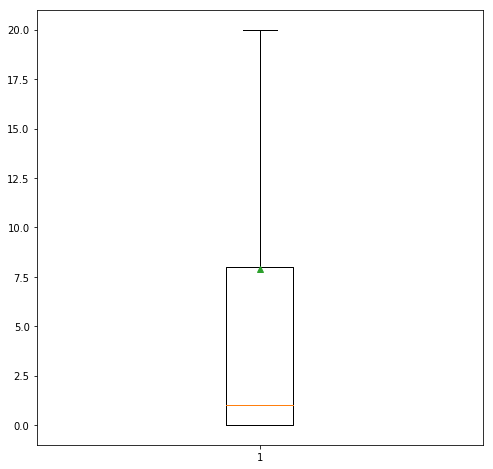

In [526]:
plt.figure(figsize=(8, 8))
plt.boxplot(aux[(aux['event'] == 'conversion')]['see_before_buy'], showfliers = False, showmeans = True);

In [527]:
aux[(aux['event'] == 'conversion')]['see_before_buy'].mean()

7.895051194539249

## Ahora analizaremos la relación entre vistas de los modelos de celulares

In [532]:
aux2 = df[df['event'] == 'viewed product'][['person', 'model']].drop_duplicates()

In [533]:
top_models = df[df['event'] == 'viewed product']['model'].value_counts().head(20).index.values.tolist() #Nos quedamos solamente con los modelos de celulares más populares

In [534]:
top_models

['iPhone 6',
 'iPhone 5s',
 'iPhone 6S',
 'iPhone 7',
 'Samsung Galaxy S7 Edge',
 'Samsung Galaxy S7',
 'iPhone 7 Plus',
 'iPhone SE',
 'Samsung Galaxy S8',
 'iPhone 6S Plus',
 'iPhone 6 Plus',
 'iPhone 5c',
 'Samsung Galaxy J5',
 'Samsung Galaxy S6 Flat',
 'Samsung Galaxy S6 Edge',
 'Samsung Galaxy S8 Plus',
 'iPhone 5',
 'Samsung Galaxy J7 Prime',
 'Motorola Moto G4 Plus',
 'Motorola Moto X Play 4G Dual']

In [535]:
aux2.head() #Nos quedamos con todas las vistas realizadas de los modelos mas populares (sin combinaciones "persona-modelo" repetidas)

,person,model
2,0004b0a2,iPhone 5s
4,0006a21a,Samsung Galaxy S8
13,000a54b2,Motorola Moto Z Play
22,000a54b2,iPhone 7 Plus
26,000a54b2,iPhone 6S


In [536]:
aux2 = aux2[aux2['model'].map(lambda x : x in top_models)]
aux2.sort_values(by = ['person', 'model'], inplace = True)

In [561]:
models_viewed = (aux2.groupby('person')['model'].apply(lambda x: pd.DataFrame(list(combinations(x,2))))
        .reset_index(level=1, drop=True)
        .reset_index())

In [562]:
models_viewed['count'] = 1

In [563]:
models_viewed = models_viewed.groupby([0,1])['count'].sum().reset_index().sort_values('count', ascending = False).rename(columns = {
    0 : 'Modelo A',
    1 : 'Modelo B',
    'count': 'combinations'
})

In [564]:
models_viewed.head() #En este DF contamos la cantidad de personas que vieron el Modelo A y también el Modelo B

,Modelo A,Modelo B,combinations
170,iPhone 6,iPhone 6S,2559
162,iPhone 5s,iPhone 6,2291
181,iPhone 6S,iPhone 7,1832
172,iPhone 6,iPhone 7,1782
164,iPhone 5s,iPhone 6S,1532


Vemos que la mayor cantidad de relaciones se dan entre el iPhone 6 y el iPhone 6S

In [565]:
models_viewed_pivot = models_viewed.pivot(index='Modelo A', columns='Modelo B', values='combinations')

In [566]:
models_viewed_pivot

Modelo B,Motorola Moto X Play 4G Dual,Samsung Galaxy J5,Samsung Galaxy J7 Prime,Samsung Galaxy S6 Edge,Samsung Galaxy S6 Flat,Samsung Galaxy S7,Samsung Galaxy S7 Edge,Samsung Galaxy S8,Samsung Galaxy S8 Plus,iPhone 5,iPhone 5c,iPhone 5s,iPhone 6,iPhone 6 Plus,iPhone 6S,iPhone 6S Plus,iPhone 7,iPhone 7 Plus,iPhone SE
Modelo A,,,,,,,,,,,,,,,,,,,
Motorola Moto G4 Plus,327.0,208.0,305.0,211.0,297.0,277.0,245.0,180.0,180.0,197.0,168.0,376.0,309.0,151.0,233.0,141.0,177.0,170.0,188.0
Motorola Moto X Play 4G Dual,NaN,253.0,297.0,307.0,440.0,436.0,336.0,285.0,236.0,240.0,202.0,490.0,463.0,188.0,287.0,185.0,252.0,225.0,237.0
Samsung Galaxy J5,NaN,NaN,407.0,274.0,470.0,384.0,277.0,255.0,221.0,269.0,235.0,587.0,399.0,129.0,238.0,111.0,208.0,193.0,172.0
Samsung Galaxy J7 Prime,NaN,NaN,NaN,408.0,527.0,550.0,428.0,366.0,314.0,270.0,207.0,560.0,516.0,255.0,382.0,235.0,317.0,296.0,279.0
Samsung Galaxy S6 Edge,NaN,NaN,NaN,NaN,850.0,931.0,846.0,640.0,465.0,272.0,233.0,637.0,692.0,343.0,547.0,315.0,477.0,361.0,374.0
Samsung Galaxy S6 Flat,NaN,NaN,NaN,NaN,NaN,1054.0,731.0,624.0,454.0,355.0,295.0,845.0,784.0,331.0,523.0,306.0,452.0,382.0,397.0
Samsung Galaxy S7,NaN,NaN,NaN,NaN,NaN,NaN,1379.0,1231.0,753.0,351.0,298.0,965.0,1147.0,521.0,900.0,486.0,806.0,644.0,542.0
Samsung Galaxy S7 Edge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1252.0,864.0,303.0,269.0,742.0,984.0,551.0,883.0,551.0,861.0,691.0,499.0
Samsung Galaxy S8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1030.0,241.0,234.0,689.0,965.0,549.0,909.0,553.0,1017.0,781.0,482.0


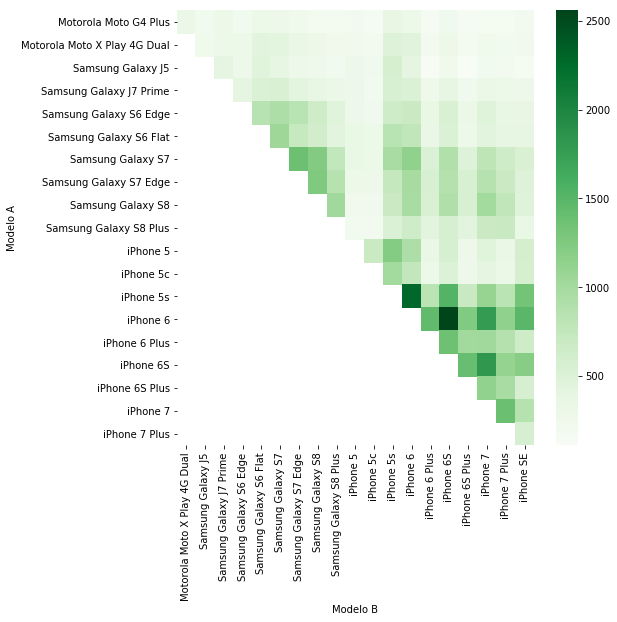

<Figure size 432x288 with 0 Axes>

In [570]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(models_viewed_pivot, fmt="g", cmap='Greens')
plt.show()
plt.savefig('heatmap.png')

## Otra información que nos parece relevante es calcular si las marcas de celulares más vistas son efectivamente las más compradas

In [27]:
sold_iphones = df[(df['event'] == 'conversion') & (df['model'].str.lower().str.contains('iphone') == True)].shape[0]
sold_motorola = df[(df['event'] == 'conversion') & (df['model'].str.lower().str.contains('motorola') == True)].shape[0]
sold_samsung = df[(df['event'] == 'conversion') & (df['model'].str.lower().str.contains('samsung') == True)].shape[0]

sold_total = df[(df['event'] == 'conversion')].shape[0]

labels = ['Samsung', 'iPhone', 'Motorola',  'Others']
quantity_sold = [sold_samsung, sold_iphones, sold_motorola,  (sold_total - sold_iphones - sold_motorola - sold_samsung)]

In [28]:
viewed_iphones = df[(df['event'] == 'viewed product') & (df['model'].str.lower().str.contains('iphone') == True)].shape[0]
viewed_motorola = df[(df['event'] == 'viewed product') & (df['model'].str.lower().str.contains('motorola') == True)].shape[0]
viewed_samsung = df[(df['event'] == 'viewed product') & (df['model'].str.lower().str.contains('samsung') == True)].shape[0]

viewed_total = df[(df['event'] == 'viewed product')].shape[0]

labels = ['Samsung', 'iPhone', 'Motorola',  'Others']
quantity_viewed = [viewed_samsung, viewed_iphones, viewed_motorola,  (viewed_total - viewed_iphones - viewed_motorola - viewed_samsung)]

In [590]:
top_viewed_sold = pd.DataFrame({'Marca' : labels,
                               'Compras' : quantity_sold,
                               'Vistas' : quantity_viewed}) 

In [593]:
top_viewed_sold.set_index('Marca', inplace=True)

In [594]:
top_viewed_sold['% Vistas'] = (top_viewed_sold['Vistas']/viewed_total)*100
top_viewed_sold['% Compras'] = (top_viewed_sold['Compras']/sold_total)*100

In [595]:
top_viewed_sold

,Compras,Vistas,% Vistas,% Compras
Marca,,,,
Samsung,641,202648,38.312748,54.692833
iPhone,323,242014,45.755306,27.559727
Motorola,149,59547,11.257990,12.713311
Others,59,24722,4.673956,5.034130


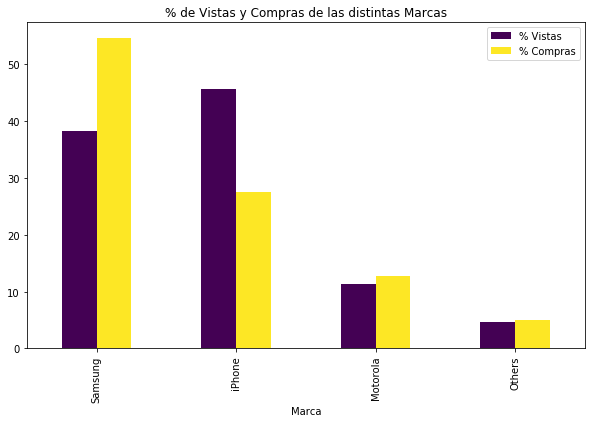

In [596]:
top_viewed_sold[['% Vistas','% Compras']].plot(kind = 'bar', figsize=(10, 6), cmap = 'viridis', title = '% de Vistas y Compras de las distintas Marcas')

## Analizaremos el impacto de las visitas y compras realizadas en cada región sobre el total de las mismas

In [123]:
regions = df[(df['event'] == 'visited site') & (df['country'] == 'Brazil')][['person','city','region']].drop_duplicates()
regions = regions[regions['region'] != 'Unknown']
populations = pd.DataFrame(df[(df['event'] == 'visited site') & (df['country'] == 'Brazil')].groupby('region')['person'].nunique()).reset_index().rename(columns = {'person' : 'poblacion'})
populations = populations[populations['region'] != 'Unknown']
regions = regions.merge(populations, on = 'region')

In [599]:
sales_regions = df[df['event'] == 'conversion'][['person', 'model']].merge(regions, on = 'person')
sales_regions['marca'] = sales_regions['model'].str.split(' ', expand = True)[0]
sales_regions = sales_regions.merge(sales_regions.groupby('region')['person'].count().reset_index().rename(columns = {'person' : '# Compras por region'}), on = 'region')
top_brand_by_region = sales_regions.groupby('region')['marca'].agg(lambda x : x.value_counts().index[0]).reset_index().rename(columns = {'marca' : 'Marca TOP Compras'})
top_brand_sales_by_region = sales_regions.groupby('region')['marca'].agg(lambda x : x.value_counts()[0]).reset_index().rename(columns = {'marca' : '# Compras de la marca TOP'})
sales_regions = sales_regions.merge(top_brand_by_region, on = 'region')
sales_regions = sales_regions.merge(top_brand_sales_by_region, on = 'region')
sales_regions['% Compras de la marca TOP'] = sales_regions['# Compras de la marca TOP'] / sales_regions['# Compras por region']
sales_regions.drop_duplicates(subset = 'region', inplace = True)
sales_regions = sales_regions[['region', 'population','# Compras por region','Marca TOP Compras', '# Compras de la marca TOP', '% Compras de la marca TOP']]

In [600]:
sales_regions.head() #En el siguiente DF vemos las cantidad de compras en cada región, la marca mas comprada como así también qué porcentaje de las compras se llevó esa marca TOP 

,region,population,# Compras por region,Marca TOP Compras,# Compras de la marca TOP,% Compras de la marca TOP
0,Para,468,59,Samsung,37,0.627119
59,Sao Paulo,8104,892,Samsung,483,0.541480
951,Ceara,942,75,Samsung,43,0.573333
1026,Minas Gerais,2420,311,Samsung,186,0.598071
1337,Espirito Santo,451,67,Samsung,40,0.597015


In [126]:
file = 'UFEBRASIL.shp'
brazil = gpd.read_file(file) #Utilizamos GeoPandas para graficar los resultados

In [128]:
brazil.head()

,ID,CD_GEOCODU,NM_ESTADO,NM_REGIAO,geometry
0,1,11,RONDÔNIA,NORTE,POLYGON ((-63.32720817710297 -7.97672029856090...
1,2,12,ACRE,NORTE,POLYGON ((-73.18252539408964 -7.33549646405647...
2,3,13,AMAZONAS,NORTE,POLYGON ((-67.32608847052387 2.029713905653285...
3,4,14,RORAIMA,NORTE,POLYGON ((-60.20050657607426 5.264343437578056...
4,5,15,PARÁ,NORTE,(POLYGON ((-54.95430669626876 2.58369242339712...


In [129]:
def remove_especials(x):
    return x.replace('Á','a').replace('Ã','a').replace('Í','i').replace('Ô','o').lower()

In [507]:
def plot_map_region(brazil, data, column, title):
        
    brazil['key'] = brazil['NM_ESTADO'].apply(lambda x : remove_especials(x).replace('distrito federal','federal district'))
    brazil = brazil.sort_values('key').reset_index()
    data = data[column].reset_index()
    del brazil['index']
    del data['index']
    
    brazil[column] = data[column]
    variable = column
    
    vmin, vmax = brazil[variable].min(), brazil[variable].max()
    fig, ax = plt.subplots(1, figsize=(10, 6))
    brazil.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8')
    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})
    ax.axis('off')

    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # empty array for the data range
    sm._A = []
    # add the colorbar to the figure
    cbar = fig.colorbar(sm)

In [601]:
views_regions = df[df['event'] == 'viewed product'][['person', 'model']].merge(regions, on = 'person')
views_regions['marca'] = views_regions['model'].str.split(' ', expand = True)[0]
views_regions = views_regions.merge(views_regions.groupby('region')['person'].count().reset_index().rename(columns = {'person' : '# Vistas por region'}), on = 'region')
top_brand_by_region = views_regions.groupby('region')['marca'].agg(lambda x : x.value_counts().index[0]).reset_index().rename(columns = {'marca' : 'Marca TOP vistas'})
top_brand_views_by_region = views_regions.groupby('region')['marca'].agg(lambda x : x.value_counts()[0]).reset_index().rename(columns = {'marca' : '# Vistas de la Marca TOP'})
views_regions = views_regions.merge(top_brand_by_region, on = 'region')
views_regions = views_regions.merge(top_brand_views_by_region, on = 'region')
views_regions['% Vistas de la marca TOP'] = views_regions['# Vistas de la Marca TOP'] / views_regions['# Vistas por region']
views_regions.drop_duplicates(subset = 'region', inplace = True)
views_regions = views_regions[['region','# Vistas por region','Marca TOP vistas', '# Vistas de la Marca TOP', '% Vistas de la marca TOP']]

In [602]:
region_data = views_regions.merge(sales_regions, on = 'region')
region_data['key'] = region_data['region'].apply(lambda x : x.lower())
region_data.sort_values('key', inplace = True)
region_data['Vistas/Compras'] = region_data['# Vistas por region']/region_data['# Compras por region']

In [604]:
region_data['Vistas per capita'] = region_data['# Vistas por region']/region_data['population']
region_data['Compras per capita'] = region_data['# Compras por region']/region_data['population']

In [612]:
region_data.sort_values('Vistas/Compras', ascending = False)

,region,# Vistas por region,Marca TOP vistas,# Vistas de la Marca TOP,% Vistas de la marca TOP,population,# Compras por region,Marca TOP Compras,# Compras de la marca TOP,% Compras de la marca TOP,key,Vistas/Compras,Vistas per capita,Compras per capita
18,Sergipe,7686,Samsung,3209,0.417512,167,7,Samsung,5,0.714286,sergipe,1098.000000,46.023952,0.041916
19,Santa Catarina,17556,Samsung,7263,0.413705,604,22,Samsung,11,0.500000,santa catarina,798.000000,29.066225,0.036424
11,Mato Grosso,8723,Samsung,4946,0.567007,201,12,Samsung,9,0.750000,mato grosso,726.916667,43.398010,0.059701
22,Acre,2136,iPhone,1430,0.669476,43,3,iPhone,2,0.666667,acre,712.000000,49.674419,0.069767
9,Parana,36169,Samsung,15590,0.431032,925,58,Samsung,33,0.568966,parana,623.603448,39.101622,0.062703
16,Alagoas,7483,Samsung,2806,0.374983,235,12,iPhone,6,0.500000,alagoas,623.583333,31.842553,0.051064
0,Pernambuco,39884,iPhone,18821,0.471893,958,66,Samsung,34,0.515152,pernambuco,604.303030,41.632568,0.068894
3,Rio Grande do Sul,49113,iPhone,23740,0.483375,917,92,Samsung,47,0.510870,rio grande do sul,533.836957,53.558342,0.100327
12,Ceara,33954,iPhone,14323,0.421835,942,75,Samsung,43,0.573333,ceara,452.720000,36.044586,0.079618
6,Paraíba,9585,iPhone,4011,0.418466,306,22,Samsung,13,0.590909,paraíba,435.681818,31.323529,0.071895


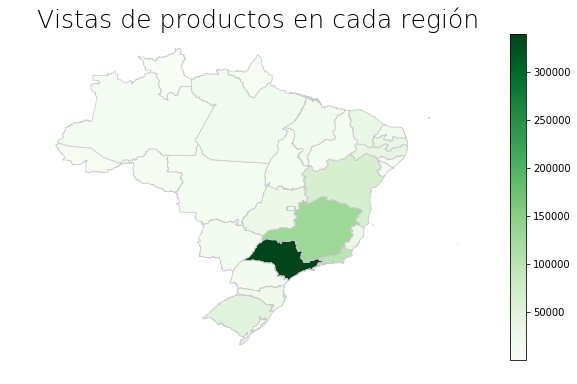

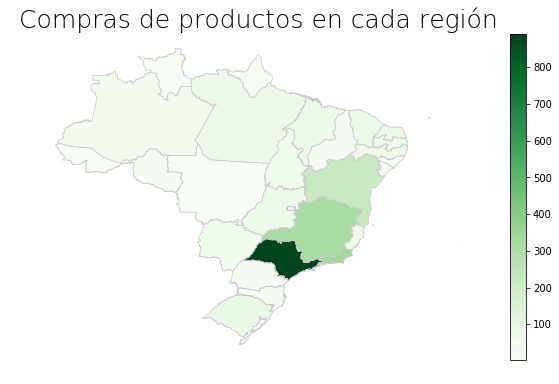

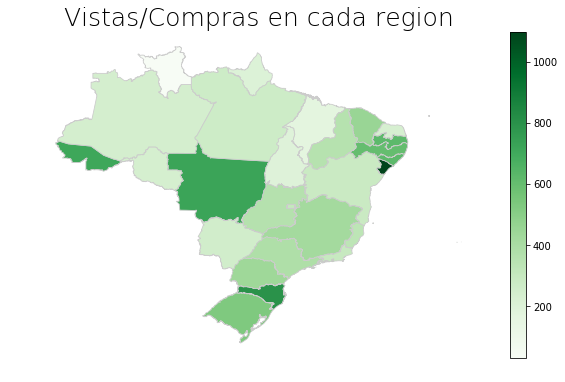

In [606]:
plot_map_region(brazil, region_data, '# Vistas por region', 'Vistas de productos en cada región')
plot_map_region(brazil, region_data, '# Compras por region', 'Compras de productos en cada región')
plot_map_region(brazil, region_data, 'Vistas/Compras', 'Vistas/Compras en cada region')

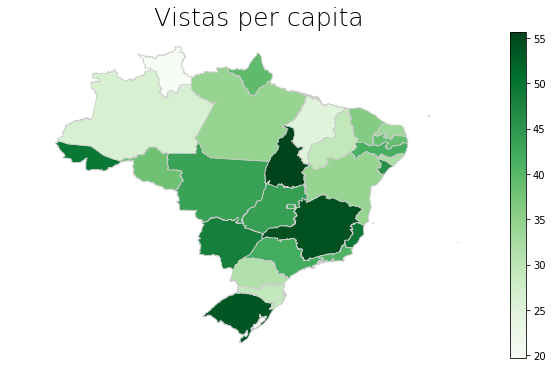

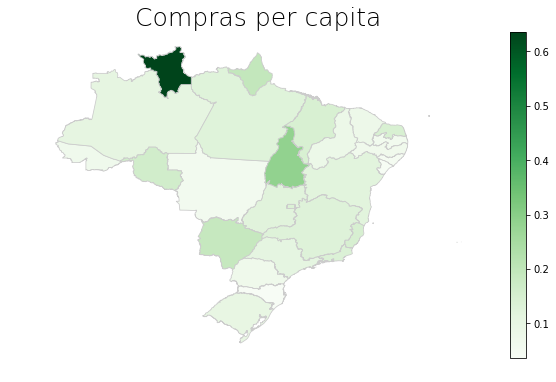

In [607]:
plot_map_region(brazil, region_data, 'Vistas per capita', 'Vistas per capita')
plot_map_region(brazil, region_data, 'Compras per capita', 'Compras per capita')

Ahora haciendo una ponderación de la cantidad de vistas y compras por la cantidad de usuarios de cada región, vemos cómo aparecen zonas que son realmente valorables y que antes quedaban eclipsadas por las regiones más pobladas.

## Ahora buscaremos analizar la "fidelidad de los usuarios". Esto lo intentaremos exponer teniendo en cuenta la marca de celular que  buscan y compran relacionando esto con el sistema operativo desde el cual navegan.

In [577]:
OS = df[(df['event'] == 'visited site') & (df['device_type'] == 'Smartphone')][['person', 'operating_system_version']]
OS['SO Usuario'] = OS['operating_system_version'].str.split(' ', expand = True)[0]
OS = OS[(OS['SO Usuario'] == 'Android') | (OS['SO Usuario'] == 'iOS')]
del OS['operating_system_version']
OS.drop_duplicates(inplace=True)
OS.drop_duplicates(subset= 'person', keep=False, inplace = True)

In [578]:
views = df[df['event'] == 'viewed product'][['person', 'model']]
conditions = [
    views['model'].str.split(' ', expand = True)[0] == 'iPhone'
]
option = ['iOS']
views['SO Visto'] = np.select(conditions, option, 'No iOS')

views = views.merge(OS, on = 'person')
views_pcts = views.groupby(['SO Usuario','SO Visto'])['person'].count().groupby(level=0).apply(lambda x : 100 * x / float(x.sum())).reset_index()
views_pcts = views_pcts.rename(columns = {'person' : '% Vistas por SO'})
views_pcts

,SO Usuario,SO Visto,% Vistas por SO
0,Android,No iOS,54.82099
1,Android,iOS,45.17901
2,iOS,No iOS,28.79615
3,iOS,iOS,71.20385


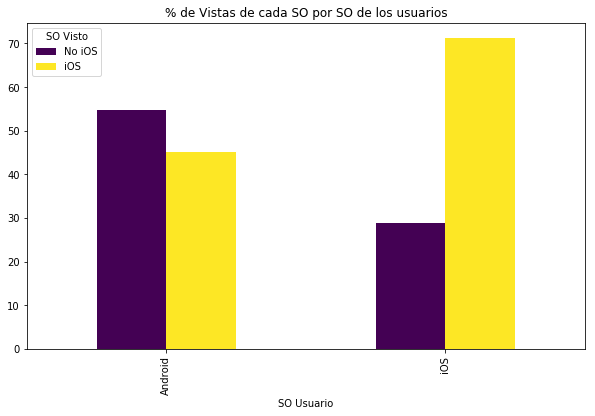

In [580]:
pcts_graph = views.groupby(['SO Usuario','SO Visto'])['person'].count().groupby(level=0).apply(lambda x : 100 * x / float(x.sum())).unstack()
pcts_graph.plot(kind = 'bar', figsize=(10, 6), cmap = 'viridis', title='% de Vistas de cada SO por SO de los usuarios');

In [582]:
sales = df[df['event'] == 'conversion'][['person', 'model']]
conditions = [
    sales['model'].str.split(' ', expand = True)[0] == 'iPhone'
]
option = ['iOS']
sales['SO Comprado'] = np.select(conditions, option, 'No iOS')

sales = sales.merge(OS, on = 'person')
sales_pcts = sales.groupby(['SO Usuario','SO Comprado'])['person'].count().groupby(level=0).apply(lambda x : 100 * x / float(x.sum())).reset_index()
sales_pcts = sales_pcts.rename(columns = {'person' : '% de Compras por SO'})
sales_pcts

,SO Usuario,SO Comprado,% de Compras por SO
0,Android,No iOS,75.357143
1,Android,iOS,24.642857
2,iOS,No iOS,44.000000
3,iOS,iOS,56.000000


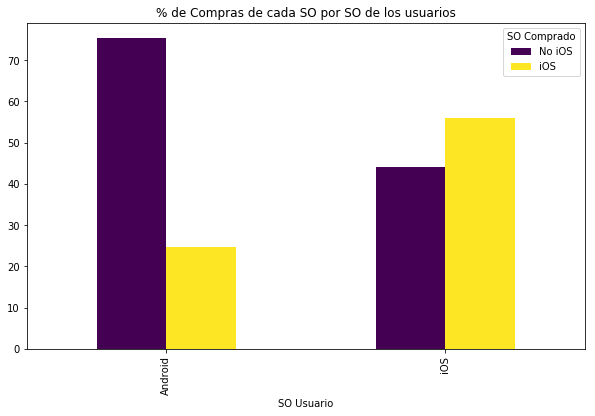

In [583]:
pcts_graph = sales.groupby(['SO Usuario','SO Comprado'])['person'].count().groupby(level=0).apply(lambda x : 100 * x / float(x.sum())).unstack()
pcts_graph.plot(kind = 'bar', figsize=(10, 6), cmap = 'viridis', title='% de Compras de cada SO por SO de los usuarios');

Vemos en este gráfico que los usuarios Android por más que buscan gran cantidad de productos Apple, la gran mayoria termina comprando productos que usan su mismo sistema operativo. Así tambien vemos que los usuarios de iOS en su mayoría siguen iPhones.

## En una ultima etapa buscaremos analizar el tiempo que transcurre desde que una persona ve un modelo hasta que lo compra

In [448]:
persons_w_sales = (aux[aux['event'] == 'conversion']['person'].values.tolist()) #Creamos una lista con las personas que compraron

In [449]:
views_w_conversions = aux[aux['person'].isin(persons_w_sales)] #Nos quedamos con los eventos realizados por personas que compraron

In [450]:
views_w_conversions = views_w_conversions[views_w_conversions['see_before_buy'] > 0] #Nos quedamos solamente con los que vieron el producto antes de comprarlo

In [451]:
sold_models_person = views_w_conversions[views_w_conversions['event'] == 'conversion'][['person', 'model']]

In [452]:
views_w_conversions.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,see_before_buy
121,2018-01-31 17:01:46,viewed product,00204059,NaN,2699,iPhone 5s,Bom,16GB,Dourado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
122,2018-01-31 17:01:47,viewed product,00204059,NaN,2699,iPhone 5s,Bom,16GB,Dourado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
124,2018-01-31 17:03:56,viewed product,00204059,NaN,3647,iPhone 5c,Bom,8GB,Branco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
128,2018-02-01 23:16:46,viewed product,00204059,NaN,7631,Motorola Moto G3 4G,Bom,16GB,Preto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
130,2018-02-01 23:20:02,viewed product,00204059,NaN,2699,iPhone 5s,Bom,16GB,Dourado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [453]:
views_w_conversions.shape

(61638, 24)

In [454]:
sold_models_person.head()

,person,model
2282,00c13dee,Samsung Galaxy Core Plus Duos TV
4245,0146a9df,iPhone 5s
6985,01db2fe6,Samsung Galaxy J5
14236,03bdcd81,Samsung Galaxy S6 Edge
16800,04850add,iPhone 6


In [455]:
views_w_conversions = views_w_conversions.merge(sold_models_person, on = ['person', 'model']) #Nos quedamos solamente con las vistas de modelos comprados

In [456]:
views_w_conversions.shape

(20199, 24)

In [457]:
first_view_models = views_w_conversions[(views_w_conversions['event'] == 'viewed product') & (views_w_conversions['see_before_buy'] == 1.0)].drop_duplicates(subset = ['person', 'model']) #armamos un DF con las primeras vistas de los productos comprados
first_view_models['convertion_id'] = range(1, len(first_view_models) +1)

In [458]:
convertions = views_w_conversions[views_w_conversions['event'] == 'conversion'].drop_duplicates(subset = ['person', 'model']) #Nos quedamos solamente con una compra del mismo modelo por persona
convertions['convertion_id'] = range(1, len(convertions) +1)

In [459]:
first_view_models.shape

(630, 25)

In [460]:
convertions.shape

(630, 25)

In [461]:
conv = first_view_models.append(convertions).sort_values(by = ['person', 'timestamp'])

In [469]:
conv.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'see_before_buy',
       'convertion_id'],
      dtype='object')

In [470]:
conv = conv[['timestamp', 'event', 'person','sku', 'model','see_before_buy','convertion_id']]

In [474]:
conv['lapsus'] = conv.groupby(['person', 'model'])['timestamp'].diff() #Creamos una columna con la diferencia entre la primera vista de un modelo y su primera compra

In [483]:
conv['brand'] = conv['model'].str.split(' ', expand = True)[0]

In [485]:
conv.head(6)

,timestamp,event,person,sku,model,see_before_buy,convertion_id,lapsus,brand
0,2018-04-26 22:13:06,viewed product,00c13dee,6664,Samsung Galaxy Core Plus Duos TV,1.0,1,NaT,Samsung
4,2018-04-26 22:28:53,conversion,00c13dee,6650,Samsung Galaxy Core Plus Duos TV,4.0,1,0 days 00:15:47,Samsung
7,2018-03-06 01:37:22,viewed product,0146a9df,2694,iPhone 5s,1.0,2,NaT,iPhone
9,2018-03-16 13:50:25,conversion,0146a9df,2694,iPhone 5s,2.0,2,10 days 12:13:03,iPhone
16,2018-02-09 21:50:07,viewed product,01db2fe6,6357,Samsung Galaxy J5,1.0,3,NaT,Samsung
21,2018-02-09 22:07:07,conversion,01db2fe6,6357,Samsung Galaxy J5,5.0,3,0 days 00:17:00,Samsung


In [493]:
conv['lapsus'].mean()

Timedelta('7 days 08:09:09.711111')